## Import Python Packages

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Import Data

In [2]:
df = pd.read_csv('FinalData.csv')

In [3]:
df.head()

,Unnamed: 0,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook,SocialMedia
0,0,Närke Kaggen Stormaktsporter,9.500000,4.489771,557.0,Imperial Stout,Microbrewery,Örebro,NaN,Sweden,0,0,0
1,1,Westvleteren 12 (XII),10.200000,4.426578,3332.0,Abt/Quadrupel,Microbrewery,Westvleteren,NaN,Belgium,0,0,0
2,2,Schramm’s The Heart of Darkness,14.000000,4.423655,77.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
3,3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,4.421873,50.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
4,4,Cigar City Pilot Series Dragonfruit Passion Fr...,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1,1


In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
#Get beers from the top 15 countries
total_beers = df.groupby('Country').Country.count()
total_beers1 = dict(total_beers.sort_values(ascending=False).head(15))
countries = list(total_beers1.keys())
top_15 = pd.DataFrame()
for c in countries:
    top_15 = top_15.append(df[df.Country == c])


In [6]:
data = top_15

In [7]:
data = data.drop(['BeerStyle','BreweryType','City','State','Name','has_twitter','has_facebook'], axis=1)

## K-Means Clustering

In [8]:
f1 = data.ABV.values
f2 = data.AverageRating.values
f3 = data.RatingCount.values
f4 = data.SocialMedia.values
X = np.array(list(zip(f1,f2,f3,f4)))

In [10]:
model = KMeans(n_clusters=15)

In [11]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
labels = model.predict(X)

In [13]:
abv = X[:,0]
avgrating = X[:,1]
ratcount = X[:,2]

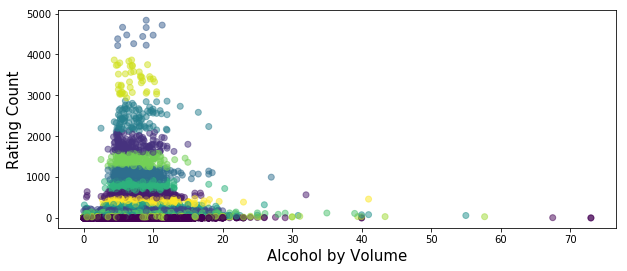

In [14]:
plt.figure(figsize=(10,4))
plt.scatter(abv,ratcount,c=labels,alpha=0.5)
plt.xlabel('Alcohol by Volume', size=15)
plt.ylabel('Rating Count',size=15)
plt.show()

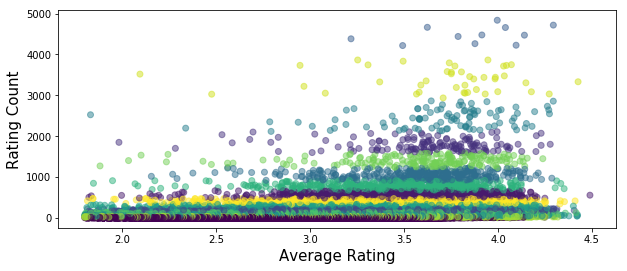

In [15]:
plt.figure(figsize=(10,4))
plt.scatter(avgrating,ratcount,c=labels,alpha=0.5)
plt.xlabel('Average Rating', size=15)
plt.ylabel('Rating Count',size=15)
plt.show()

In [16]:
print (model.inertia_)

34309050.4305


The inertia is too high, which indicates that the labels are spread wide apart. We will do an inertia plot with different clusters.

In [17]:
df_model = pd.DataFrame({'labels':labels,'country':data.Country})

In [18]:
ct_model = pd.crosstab(df_model['labels'],df_model['country'])

In [19]:
ct_model

country,Belgium,Canada,Czech Republic,Denmark,England,Finland,France,Germany,Netherlands,Norway,Poland,Scotland,Spain,Sweden,United States
labels,,,,,,,,,,,,,,,
0,2312,10365,2121,4550,16028,2205,2259,8247,3415,2533,2982,2207,2194,3546,62723
1,105,16,3,30,41,0,3,44,20,11,9,19,1,4,470
2,21,3,0,1,5,0,1,13,3,1,0,4,0,0,87
3,302,133,54,265,256,14,32,168,126,51,87,122,23,86,1658
4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,5
5,55,6,1,11,17,0,0,26,6,4,1,9,2,1,182
6,12,3,1,1,7,0,0,6,1,0,0,1,0,0,62
7,659,871,167,1190,1440,232,180,936,615,323,539,281,157,591,5194
8,192,50,21,133,140,4,21,104,45,27,32,63,16,33,1087


In [20]:
#run K-means with different number of clusters to get the inertia plot
ks = [15,25,35,45,55,65,75]
inertias =[]

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

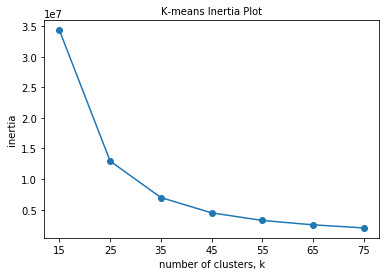

In [21]:
plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters, k', size=10)
plt.ylabel('inertia',size=10)
plt.title('K-means Inertia Plot', size =10)
plt.xticks(ks)
plt.show()

The inertias are still very high even for 45 clusters. 

In [22]:
model_45 = KMeans(n_clusters=45)

In [23]:
model_45.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=45, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
labels_45 = model_45.predict(X)

In [25]:
df_model = pd.DataFrame({'labels':labels_45,'country':data.Country})

In [26]:
ct_model = pd.crosstab(df_model['labels'],df_model['country'])

In [27]:
ct_model

country,Belgium,Canada,Czech Republic,Denmark,England,Finland,France,Germany,Netherlands,Norway,Poland,Scotland,Spain,Sweden,United States
labels,,,,,,,,,,,,,,,
0,491,3951,903,882,5862,633,879,2706,939,866,1091,800,896,1105,25215
1,9,0,0,0,4,1,0,4,1,0,1,1,0,0,47
2,72,18,5,23,34,0,7,23,11,5,5,12,4,9,312
3,6,0,0,0,0,0,0,1,1,0,0,0,0,0,7
4,128,69,25,131,123,10,18,91,71,27,42,47,13,44,760
5,14,2,2,4,5,0,0,8,2,1,0,2,0,0,109
6,4,1,0,0,1,0,0,2,0,0,0,0,0,0,20
7,263,321,55,406,522,77,56,312,227,114,186,94,56,226,1865
8,1,0,0,0,1,0,0,3,1,0,0,0,0,0,20


Since we have a large variance in the data we can try using the standard scaler and 35 clusters.

In [29]:
scaler = StandardScaler()

In [30]:
model_35 = KMeans(n_clusters=35)

In [31]:
pipeline = make_pipeline(scaler,model_35)

In [32]:
pipeline.fit(X)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=35, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [33]:
labels_35 = pipeline.predict(X)

In [34]:
df_model = pd.DataFrame({'labels':labels_35,'country':data.Country})
ct_model = pd.crosstab(df_model['labels'],df_model['country'])

In [35]:
ct_model

country,Belgium,Canada,Czech Republic,Denmark,England,Finland,France,Germany,Netherlands,Norway,Poland,Scotland,Spain,Sweden,United States
labels,,,,,,,,,,,,,,,
0,175,600,36,337,342,72,52,111,284,81,84,85,106,191,6361
1,32,603,77,222,3807,175,50,126,71,299,126,485,104,429,2767
2,1105,394,162,665,409,233,440,1079,930,226,167,12,192,110,310
3,15,3,1,1,7,0,0,10,2,0,0,1,0,0,77
4,138,984,82,513,1115,77,53,134,275,210,240,197,143,322,8939
5,38,27,0,78,27,0,0,3,27,18,8,21,3,15,593
6,272,547,609,651,2695,543,400,3541,311,417,336,198,287,259,395
7,56,1590,150,755,1349,248,165,473,307,219,378,247,281,664,8423
8,56,61,10,54,220,0,5,36,20,17,14,84,4,31,1022


In [36]:
model_35.inertia_

59067.826933707947

We can try to use the normalizer in sklearn package to check if it improves the predictions.

In [38]:
normalizer = Normalizer()

In [39]:
pipeline = make_pipeline(normalizer,model_35)

In [40]:
pipeline.fit(X)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=35, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [41]:
labels_35 = pipeline.predict(X)

In [42]:
df_model = pd.DataFrame({'labels':labels_35,'country':data.Country})
ct_model = pd.crosstab(df_model['labels'],df_model['country'])

In [43]:
ct_model

country,Belgium,Canada,Czech Republic,Denmark,England,Finland,France,Germany,Netherlands,Norway,Poland,Scotland,Spain,Sweden,United States
labels,,,,,,,,,,,,,,,
0,1348,624,263,1105,1466,130,159,1062,463,272,406,451,124,463,7277
1,42,795,103,209,719,92,51,145,166,137,155,129,119,241,4303
2,56,571,129,286,1868,123,93,374,94,164,217,222,111,295,3087
3,6,354,32,52,656,36,25,77,42,58,51,91,43,90,1983
4,134,230,231,252,710,180,137,916,129,133,155,38,115,126,164
5,61,189,19,43,94,24,55,73,102,24,60,22,57,59,2772
6,488,963,171,1164,2196,251,276,1535,551,342,551,285,193,583,4874
7,24,596,83,151,541,87,48,93,116,111,95,95,100,152,3408
8,122,265,26,124,129,33,82,129,141,46,61,17,58,72,2187


## KNN Classfier - US Beers

We will apply the KNN method on beers only from the United States. We will also create a new target variable - 0 for average rating less than 0 and 1 for average rating greater than 4.

In [61]:
df_us = df[df.Country == 'United States']

In [62]:
df_us.head()

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook,SocialMedia
2,Schramm’s The Heart of Darkness,14.000000,4.423655,77.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,4.421873,50.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
4,Cigar City Pilot Series Dragonfruit Passion Fr...,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1,1
6,Goose Island Bourbon County Stout - Rare 2010,13.000000,4.410718,417.0,Imperial Stout,Commercial Brewery,Chicago,Illinois,United States,1,1,1
7,Toppling Goliath Mornin’ Delight,12.000000,4.405847,186.0,Imperial Stout,Microbrewery,Decorah,Iowa,United States,1,1,1


In [63]:
df_us = df_us.drop(['Name','City','State','has_twitter','has_facebook','BreweryType','Country'],axis=1)

In [64]:
df_us['Target'] = np.where(df_us.AverageRating < 4,0,1)

In [65]:
df_us.head()

,ABV,AverageRating,RatingCount,BeerStyle,SocialMedia,Target
2,14.000000,4.423655,77.0,Mead,1,1
3,14.000000,4.421873,50.0,Mead,1,1
4,3.979168,4.420719,46.0,Berliner Weisse,1,1
6,13.000000,4.410718,417.0,Imperial Stout,1,1
7,12.000000,4.405847,186.0,Imperial Stout,1,1


In [68]:
#we can now drop the average rating column
df_us = df_us.drop(['AverageRating'],axis=1)

In [72]:
#we will create dummy variables for the beer_styles column 
style_dummies = pd.get_dummies(df_us.BeerStyle,prefix='style')

In [74]:
df_us = df_us.join(style_dummies)

In [75]:
df_us.head()

,ABV,RatingCount,BeerStyle,SocialMedia,Target,style_Abbey Dubbel,style_Abbey Tripel,style_Abt/Quadrupel,style_Altbier,style_Amber Ale,...,style_Sour/Wild Ale,style_Specialty Grain,style_Spice/Herb/Vegetable,style_Stout,style_Sweet Stout,style_Traditional Ale,style_Weizen Bock,style_Wheat Ale,style_Witbier,style_Zwickel/Keller/Landbier
2,14.000000,77.0,Mead,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.000000,50.0,Mead,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.979168,46.0,Berliner Weisse,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13.000000,417.0,Imperial Stout,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,12.000000,186.0,Imperial Stout,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
X = df_us.drop(['Target','BeerStyle'],axis=1).values

In [78]:
y = df_us.Target.values

In [81]:
#split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [56]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [82]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [83]:
print (knn.score(X_test,y_test))

0.993124031886


In [84]:
y_pred = knn.predict(X_test)

In [87]:
print(confusion_matrix(y_test, y_pred))

[[26287     6]
 [  176     0]]


In [88]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     26293
          1       0.00      0.00      0.00       176

avg / total       0.99      0.99      0.99     26469



## Logisitic Regression - US Beers

We will apply logisitc regression to see how it compares to the KNN model when predicting if a beer rating is below or above 4. 

In [119]:
X = df_us.drop(['Target','BeerStyle'],axis=1).values
y = df_us.Target.values

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [121]:
logreg = LogisticRegression()

In [122]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
y_pred = logreg.predict(X_test)

In [124]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     26289
          1       0.47      0.04      0.08       180

avg / total       0.99      0.99      0.99     26469



In [126]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [127]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

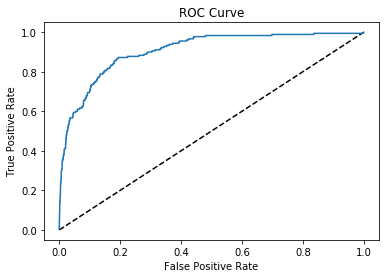

In [128]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [130]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9065894691907472


The logistic regression model is good in prediciting if a beer will have a rating above or below 4 and is comparable to the KNN neighbors model. We will apply the logistic regression to the entire dataset.

## Logisitic Regression - All Beers

In [132]:
data = df

In [134]:
data.head()

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook,SocialMedia
0,Närke Kaggen Stormaktsporter,9.500000,4.489771,557.0,Imperial Stout,Microbrewery,Örebro,NaN,Sweden,0,0,0
1,Westvleteren 12 (XII),10.200000,4.426578,3332.0,Abt/Quadrupel,Microbrewery,Westvleteren,NaN,Belgium,0,0,0
2,Schramm’s The Heart of Darkness,14.000000,4.423655,77.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,4.421873,50.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
4,Cigar City Pilot Series Dragonfruit Passion Fr...,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1,1


In [135]:
data = data.drop(['Name','City','State','has_twitter','has_facebook'],axis=1)

In [137]:
data.head()

,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,Country,SocialMedia
0,9.500000,4.489771,557.0,Imperial Stout,Microbrewery,Sweden,0
1,10.200000,4.426578,3332.0,Abt/Quadrupel,Microbrewery,Belgium,0
2,14.000000,4.423655,77.0,Mead,Meadery,United States,1
3,14.000000,4.421873,50.0,Mead,Meadery,United States,1
4,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,United States,1


In [138]:
#create target variable
data['Target'] = np.where(data.AverageRating < 4,0,1)

In [139]:
#drop the average rating
data = data.drop(['AverageRating'],axis=1)

In [140]:
data.head()

,ABV,RatingCount,BeerStyle,BreweryType,Country,SocialMedia,Target
0,9.500000,557.0,Imperial Stout,Microbrewery,Sweden,0,1
1,10.200000,3332.0,Abt/Quadrupel,Microbrewery,Belgium,0,1
2,14.000000,77.0,Mead,Meadery,United States,1,1
3,14.000000,50.0,Mead,Meadery,United States,1,1
4,3.979168,46.0,Berliner Weisse,Microbrewery,United States,1,1


In [151]:
#create dummy variables for the BeerStyle, BreweryType and Country Columns
cols = ['BeerStyle','BreweryType','Country']
for col in cols:
    dummies = pd.get_dummies(data[col],prefix=col)
    data = data.join(dummies)

In [153]:
#create X and Y arrays for model 
X = data.drop(['BeerStyle','BreweryType','Country','Target'],axis=1).values
y = data.Target.values

In [155]:
#create a train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [156]:
logreg = LogisticRegression()

In [157]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [158]:
y_pred = logreg.predict(X_test)

In [160]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     65744
          1       0.44      0.03      0.06       256

avg / total       0.99      1.00      0.99     66000



In [161]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [162]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

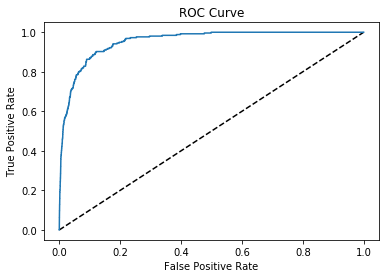

In [163]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [164]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9551187655907762


The model performs well in predicting whether the beer will have a rating above or below 4. 